# **Import thư viện và đọc dữ liệu**

In [2]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục gốc
root_folder = r'C:\AI\src\LFW - People'

# Kiểm tra xem thư mục tồn tại không
if os.path.exists(root_folder):
    # Lặp qua tất cả các tệp và thư mục trong thư mục gốc
    for root, dirs, files in os.walk(root_folder):
        print("Thư mục gốc:", root)
        # Hiển thị danh sách các thư mục con
        if dirs:
            print("Thư mục con:")
            for directory in dirs:
                print(os.path.join(root, directory))
        # Hiển thị danh sách các tệp
        if files:
            print("Tệp:")
            for file in files:
                print(os.path.join(root, file))
else:
    print("Thư mục không tồn tại.")

# Khởi tạo danh sách để lưu trữ dữ liệu
images = []
labels = []

# Kích thước ảnh chuẩn hóa
IMG_SIZE = (100, 100)

# Duyệt qua các folder con để đọc hình ảnh
for person_name in os.listdir(root_folder):
    person_folder = os.path.join(root_folder, person_name)
    if os.path.isdir(person_folder):
        for img_file in os.listdir(person_folder):
            img_path = os.path.join(person_folder, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                # Resize ảnh về kích thước chuẩn hóa và chuyển đổi sang grayscale
                img_resized = cv2.resize(img, IMG_SIZE)
                images.append(img_resized)
                labels.append(person_name)

# Chuyển đổi danh sách thành numpy array
images = np.array(images)
labels = np.array(labels)


Thư mục gốc: C:\AI\src\LFW - People
Thư mục con:
C:\AI\src\LFW - People\Bill_Gates
C:\AI\src\LFW - People\Cistiano_Ronaldo
C:\AI\src\LFW - People\Pele
C:\AI\src\LFW - People\Roberto_Carlos
C:\AI\src\LFW - People\Rohman_al-Ghozi
C:\AI\src\LFW - People\Rolandas_Paksas
C:\AI\src\LFW - People\Roland_Koch
C:\AI\src\LFW - People\Rolf_Eckrodt
C:\AI\src\LFW - People\Rolf_Zimmermann
C:\AI\src\LFW - People\Rollie_Massimino
C:\AI\src\LFW - People\Romain_Duris
C:\AI\src\LFW - People\Romano_Prodi
C:\AI\src\LFW - People\Roman_Abramovich
C:\AI\src\LFW - People\Roman_Coppola
C:\AI\src\LFW - People\Roman_Polanski
C:\AI\src\LFW - People\Roman_Tam
C:\AI\src\LFW - People\Romario_Farias
C:\AI\src\LFW - People\Romeo_Gigli
C:\AI\src\LFW - People\Ronaldo_Luis_Nazario_de_Lima
C:\AI\src\LFW - People\Ronald_Brower
C:\AI\src\LFW - People\Ronald_Harwood
C:\AI\src\LFW - People\Ronald_Ito
C:\AI\src\LFW - People\Ronald_Kadish
C:\AI\src\LFW - People\Ronald_Kessler
C:\AI\src\LFW - People\Ronald_Perelman
C:\AI\src\LFW -

# **Mã hóa Nhãn và Chia Dữ liệu**

In [4]:
# Mã hóa nhãn thành số
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu ảnh
X_train = X_train / 255.0
X_test = X_test / 255.0

# Tính số lớp nhãn
num_classes = len(np.unique(labels_encoded))

# In ra số lớp nhãn
print("Số lớp nhãn:", num_classes)


Số lớp nhãn: 87


In [10]:
from sklearn.preprocessing import LabelEncoder
from joblib import dump

# Khởi tạo LabelEncoder và mã hóa nhãn
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Lưu LabelEncoder vào tệp
dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

# **Xây Dựng Mô Hình**

In [5]:
# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Thêm lớp Dropout với tỷ lệ 0.5
    Dense(num_classes, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Hiển thị kiến trúc mô hình
model.summary()


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 87)             │        11,223 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,999 (6.65 MB)

 Trainable params: 1,742,999 (6.65 MB)

 Non-trainable params: 0 (0.00 B)

# **Tăng Cường và Huấn luyện Mô hình**

In [6]:
# Khởi tạo ImageDataGenerator với các phép biến đổi dữ liệu
datagen = ImageDataGenerator(
    rotation_range=20,        # Góc xoay của ảnh
    width_shift_range=0.1,    # Phạm vi dịch chuyển theo chiều ngang
    height_shift_range=0.1,   # Phạm vi dịch chuyển theo chiều dọc
    shear_range=0.1,          # Độ biến dạng
    zoom_range=0.1,           # Phạm vi thu phóng
    horizontal_flip=True,     # Lật ảnh theo chiều ngang
    fill_mode='nearest'       # Chiến lược điền giá trị cho các pixel mới sau khi biến đổi
)

# Tạo dữ liệu tăng cường từ dữ liệu huấn luyện
augmented_data = []
for img in X_train:
    img = np.expand_dims(img, axis=0)
    for batch in datagen.flow(img, batch_size=1):
        augmented_data.append(batch[0])
        break

# Chuyển đổi lại định dạng của dữ liệu
augmented_data = np.array(augmented_data)

# Kết hợp dữ liệu tăng cường với dữ liệu gốc
X_train_augmented = np.concatenate((X_train, augmented_data), axis=0)
y_train_augmented = np.concatenate((y_train, y_train), axis=0)

# Hiển thị số lượng dữ liệu sau khi tăng cường
print("Số lượng dữ liệu sau khi tăng cường:", len(X_train_augmented))

# Huấn luyện mô hình
history = model.fit(X_train_augmented, y_train_augmented, epochs=30, validation_data=(X_test, y_test))


Số lượng dữ liệu sau khi tăng cường: 312
Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 567ms/step - accuracy: 0.0401 - loss: 4.4286 - val_accuracy: 0.1500 - val_loss: 4.2735
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 528ms/step - accuracy: 0.1102 - loss: 4.2132 - val_accuracy: 0.1500 - val_loss: 4.1636
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 507ms/step - accuracy: 0.1232 - loss: 4.1052 - val_accuracy: 0.1500 - val_loss: 4.1573
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 500ms/step - accuracy: 0.1687 - loss: 3.9955 - val_accuracy: 0.2000 - val_loss: 4.0504
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 496ms/step - accuracy: 0.1791 - loss: 3.7371 - val_accuracy: 0.2250 - val_loss: 4.0139
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 512ms/step - accuracy: 0.1718 - loss: 3.6247 - val_accuracy: 0.2250 - val_loss: 3.9336
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 564ms/step - accuracy: 0.2099 - loss: 3.4700 - val_accuracy: 0.2500 - val_loss: 3.9322
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 465ms/step - accuracy

# **Đánh giá mô hình**

In [7]:
# Đánh giá hiệu suất của mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.3854 - loss: 6.0317
Test Loss: 6.256422996520996
Test Accuracy: 0.375


# **Sử dụng mô hình**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


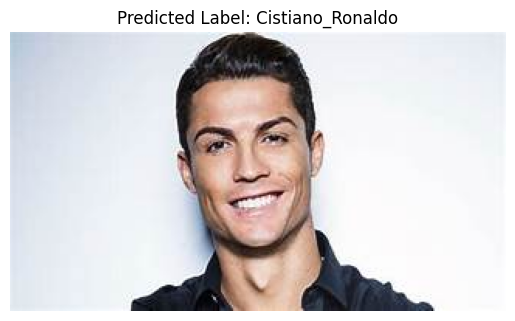

In [8]:
# Đọc ảnh mới từ file
image_path = r'C:\AI\src\LFW - People\Cistiano_Ronaldo\Cistiano_Ronaldo_0001.jpg'
new_image = cv2.imread(image_path)
resized_image = cv2.resize(new_image, IMG_SIZE)  # Resize ảnh về kích thước chuẩn hóa

# Chuẩn hóa ảnh
normalized_image = resized_image / 255.0

# Thực hiện dự đoán bằng mô hình đã huấn luyện
prediction = model.predict(np.expand_dims(normalized_image, axis=0))

# Lấy tên của người được dự đoán dựa trên nhãn đã mã hóa
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

# Hiển thị ảnh và tên của người được dự đoán
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title("Predicted Label: " + predicted_label[0])
plt.axis('off')
plt.show()


# **Lưu và tải mô hình**

In [9]:
# Lưu mô hình sử dụng Keras
model.save('face_AI_model.h5')

# Tải lại mô hình đã lưu
loaded_model = tf.keras.models.load_model('face_AI_model.h5')

# Hiển thị kiến trúc của mô hình đã tải
loaded_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 87)             │        11,223 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,743,001 (6.65 MB)

 Trainable params: 1,742,999 (6.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)